# Peter dan Serigala: Pengenalan Pembelajaran Pengukuhan

Dalam tutorial ini, kita akan belajar bagaimana menerapkan pembelajaran pengukuhan kepada masalah mencari laluan. Situasi ini diilhamkan oleh kisah dongeng muzik [Peter dan Serigala](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) oleh komposer Rusia [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Ia adalah kisah tentang perintis muda Peter, yang dengan berani keluar dari rumahnya ke kawasan hutan untuk mengejar seekor serigala. Kita akan melatih algoritma pembelajaran mesin yang akan membantu Peter meneroka kawasan sekitarnya dan membina peta navigasi yang optimum.

Pertama, mari kita import beberapa perpustakaan yang berguna:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Gambaran Keseluruhan Pembelajaran Pengukuhan

**Pembelajaran Pengukuhan** (RL) adalah teknik pembelajaran yang membolehkan kita mempelajari tingkah laku optimum bagi **agen** dalam suatu **persekitaran** dengan menjalankan banyak eksperimen. Agen dalam persekitaran ini seharusnya mempunyai **matlamat**, yang ditentukan oleh **fungsi ganjaran**.

## Persekitaran

Untuk memudahkan, mari kita anggap dunia Peter sebagai papan segi empat dengan saiz `width` x `height`. Setiap sel dalam papan ini boleh menjadi:
* **tanah**, di mana Peter dan makhluk lain boleh berjalan
* **air**, di mana jelas sekali anda tidak boleh berjalan
* **pokok** atau **rumput** - tempat di mana anda boleh berehat
* **epal**, yang mewakili sesuatu yang Peter akan gembira untuk menemui bagi mengisi perutnya
* **serigala**, yang berbahaya dan harus dielakkan

Untuk bekerja dengan persekitaran ini, kita akan mendefinisikan kelas yang dipanggil `Board`. Supaya tidak terlalu memenuhi buku nota ini, semua kod untuk bekerja dengan papan telah dipindahkan ke modul `rlboard` yang berasingan, yang kini akan kita import. Anda boleh melihat dalam modul ini untuk mendapatkan lebih banyak butiran tentang dalaman pelaksanaan.


Mari kita cipta papan rawak dan lihat bagaimana rupanya:


In [4]:
# code block 1

## Tindakan dan Polisi

Dalam contoh kita, matlamat Peter adalah untuk mencari sebiji epal, sambil mengelakkan serigala dan halangan lain. Tetapkan tindakan tersebut sebagai sebuah kamus, dan padankan dengan pasangan perubahan koordinat yang sepadan.


In [5]:
# code block 2

Strategi ejen kita (Peter) ditentukan oleh apa yang dipanggil sebagai **dasar**. Mari kita pertimbangkan dasar yang paling mudah dipanggil **pergerakan rawak**.

## Pergerakan rawak

Mari kita selesaikan masalah kita terlebih dahulu dengan melaksanakan strategi pergerakan rawak.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Fungsi Ganjaran

Untuk menjadikan polisi kita lebih bijak, kita perlu memahami pergerakan mana yang "lebih baik" daripada yang lain.


In [8]:
#code block 5

## Q-Learning

Bina Jadual-Q, atau array multi-dimensi. Oleh kerana papan kita mempunyai dimensi `width` x `height`, kita boleh mewakili Jadual-Q dengan array numpy yang berbentuk `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Hantar Q-Table kepada fungsi `plot` untuk memvisualisasikan jadual pada papan:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Intipati Q-Learning: Persamaan Bellman dan Algoritma Pembelajaran

Tulis pseudo-kod untuk algoritma pembelajaran kita:

* Inisialisasi Jadual Q (Q-Table) dengan nilai yang sama untuk semua keadaan dan tindakan
* Tetapkan kadar pembelajaran $\alpha\leftarrow 1$
* Ulang simulasi berkali-kali
   1. Mulakan di posisi rawak
   1. Ulang
        1. Pilih satu tindakan $a$ pada keadaan $s$
        2. Laksanakan tindakan dengan bergerak ke keadaan baru $s'$
        3. Jika kita menemui keadaan akhir permainan, atau jumlah ganjaran terlalu kecil - keluar dari simulasi  
        4. Hitung ganjaran $r$ di keadaan baru
        5. Kemas kini Fungsi Q mengikut persamaan Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Kemas kini jumlah ganjaran dan kurangkan $\alpha$.

## Eksploitasi vs. Eksplorasi

Pendekatan terbaik adalah untuk mengimbangi antara eksplorasi dan eksploitasi. Apabila kita semakin memahami persekitaran kita, kita akan lebih cenderung mengikuti laluan yang optimum, namun, memilih laluan yang belum diterokai sekali-sekala.

## Implementasi Python

Sekarang kita bersedia untuk melaksanakan algoritma pembelajaran. Sebelum itu, kita juga memerlukan beberapa fungsi yang akan menukar nombor sewenang-wenangnya dalam Jadual Q (Q-Table) kepada vektor kebarangkalian untuk tindakan yang sepadan:


In [10]:
# code block 7

Kami menambah sejumlah kecil `eps` kepada vektor asal untuk mengelakkan pembahagian dengan 0 dalam kes awal, apabila semua komponen vektor adalah sama.

Algoritma pembelajaran sebenar yang akan kita jalankan untuk 5000 eksperimen, juga dipanggil **epochs**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Selepas melaksanakan algoritma ini, Jadual-Q harus dikemas kini dengan nilai-nilai yang menentukan daya tarikan tindakan yang berbeza pada setiap langkah. Visualisasikan jadual di sini:


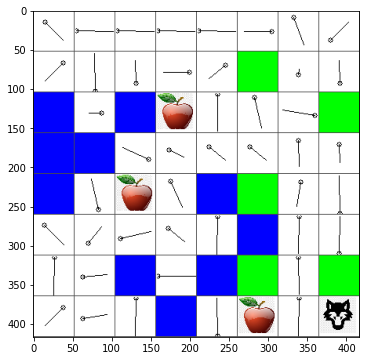

In [43]:
m.plot(Q)

## Memeriksa Polisi

Oleh kerana Q-Table menyenaraikan "daya tarikan" setiap tindakan di setiap keadaan, ia sangat mudah digunakan untuk menentukan navigasi yang efisien dalam dunia kita. Dalam kes yang paling mudah, kita hanya perlu memilih tindakan yang sepadan dengan nilai Q-Table tertinggi:


In [13]:
# code block 9

2

Jika anda mencuba kod di atas beberapa kali, anda mungkin perasan bahawa kadangkala ia hanya "tergantung", dan anda perlu menekan butang STOP dalam notebook untuk menghentikannya.

> **Tugas 1:** Ubah fungsi `walk` untuk menghadkan panjang maksimum laluan kepada bilangan langkah tertentu (contohnya, 100), dan perhatikan kod di atas mengembalikan nilai ini dari semasa ke semasa.

> **Tugas 2:** Ubah fungsi `walk` supaya ia tidak kembali ke tempat yang telah dilalui sebelumnya. Ini akan menghalang `walk` daripada berulang, namun, agen masih boleh berakhir dalam keadaan "terperangkap" di lokasi yang tidak dapat dilepaskan.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


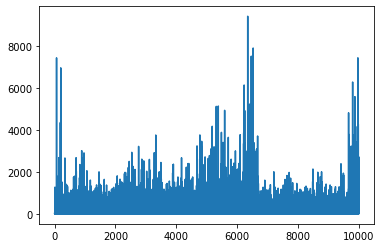

In [57]:
plt.plot(lpath)

## Latihan
## Dunia Peter dan Serigala yang lebih realistik



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan perkhidmatan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Walaupun kami berusaha untuk memastikan ketepatan, sila ambil maklum bahawa terjemahan automatik mungkin mengandungi kesilapan atau ketidaktepatan. Dokumen asal dalam bahasa asalnya harus dianggap sebagai sumber yang berwibawa. Untuk maklumat yang kritikal, terjemahan manusia profesional adalah disyorkan. Kami tidak bertanggungjawab atas sebarang salah faham atau salah tafsir yang timbul daripada penggunaan terjemahan ini.
